# Importing Libraries
The Following Libraries were imported to help with this project.
Neccessary files were also uploaded.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import files
uploaded = files.upload()

Saving helpers.py to helpers.py
Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv
Saving winequality.names to winequality.names


Import the data and show useful statistics of both datasets.

In [2]:
import io
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

print(red_wine.describe())
print(white_wine.describe())

# Dataset is now stored in a Pandas Dataframe

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Further examining the datasets.

In [3]:
print(f"Number of examples: {red_wine.shape[0]}")
print(f"Number of features: {red_wine.shape[1]}")
print(f"List of features:\n\t{red_wine.columns}")
print(f"\nExamining the first 10 entries in the dataset:")
display(red_wine.head(10))

Number of examples: 1599
Number of features: 12
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Examining the first 10 entries in the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Showing how the wines are distributed by quality as in Task 1A

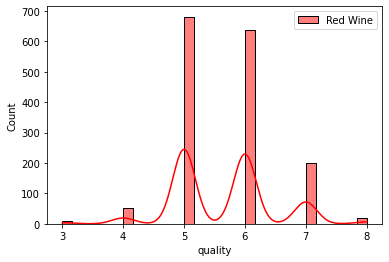

In [4]:
# Histplot to show distribution of red wine
import seaborn as sns

sns.histplot(red_wine, x='quality', kde=True, color='red', label='Red Wine')

plt.legend()
plt.show()

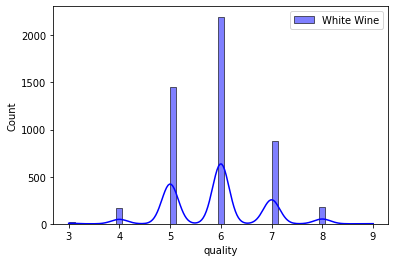

In [5]:
# Histplot to show distribution of red wine
sns.histplot(white_wine, x='quality', kde=True, color='blue', label='White Wine')
plt.legend()
plt.show()

Discretising the alcohol content using the following requirements as in 1B;
low < (average - stddev)

(average - stddev) < mid < (average + stddev)

high > (average + stddev). 

In [6]:
#Finding the average and standard deviation alcohol value of red wines
alcohol_red = red_wine['alcohol']
red_value = alcohol_red.values
red_avg = sum(red_value) / len(red_value)
print(red_avg)
import numpy as np
red_stdv = np.std(red_value)
print(red_stdv)

10.422983114446502
1.0653343003437483


Function to add all alcohol_cat values

In [7]:
#Code to categorize the alcohol_cat
alcoholdv = []
alc = ''
for idx in red_wine.index:
  alcohol_content = red_wine['alcohol'][idx]
  if alcohol_content < (red_avg - red_stdv):
    alc = 'low'
  elif (red_avg-red_stdv) < alcohol_content < (red_avg+red_stdv):
    alc = 'mid'
  elif (alcohol_content > (red_avg + red_stdv)):
    alc = 'high'

  alcoholdv.append(alc)
red_wine['alcohol_cat'] = alcoholdv

In [8]:
red_wine.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mid
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,mid
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mid
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,mid
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6,high
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5,mid
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5,low
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5,mid


In [9]:
# Same now done for white
alcohol_white = white_wine['alcohol']

In [10]:
white_value = alcohol_white.values

In [11]:
white_avg = sum(white_value) / len(white_value)
print(white_avg)

10.514267047774638


In [12]:
white_stdv = np.std(white_value)
print(white_stdv)

1.2304949365418656


In [13]:
alcoholdv1 = []
alc1 = ''
for idx in white_wine.index:
  alcohol_content = white_wine['alcohol'][idx]
  if alcohol_content < (white_avg - white_stdv):
    alc1 = 'low'
  elif (white_avg-white_stdv) < alcohol_content < (white_avg+white_stdv):
    alc1 = 'mid'
  elif (alcohol_content > (white_avg + white_stdv)):
    alc1 = 'high'

  alcoholdv1.append(alc1)

In [14]:
white_wine['alcohol_cat'] = alcoholdv1

In [15]:
white_wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,mid
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,mid
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,mid
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,mid
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,mid
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,mid
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,mid
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,mid


Describing the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content.

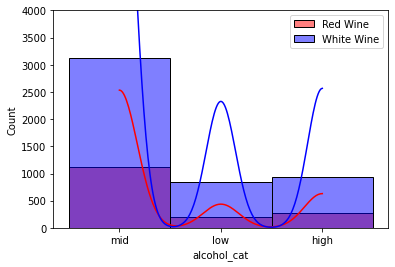

In [16]:
# Histplot to show the distribution of alcohol content
sns.histplot(red_wine, x='alcohol_cat', kde=True, color='red', label='Red Wine')
sns.histplot(white_wine, x='alcohol_cat', kde=True, color='blue', label='White Wine')
plt.ylim(0,4000)
plt.legend()
plt.show()

In the following: Plotted residual sugar variable and tried to find a suitable threshold which was decided as the median so it splits the datasets evenly.

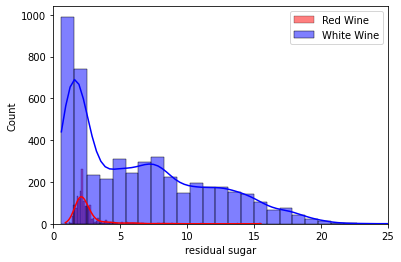

5.2


In [17]:
sns.histplot(red_wine, x='residual sugar', kde=True, color='red', label='Red Wine')
sns.histplot(white_wine, x='residual sugar', kde=True, color='blue', label='White Wine')
plt.xlim(0,25)
plt.legend()
plt.show()
white_sug = white_wine['residual sugar']
white_sugv = white_sug.values

print(np.median(white_sugv))

Function to seperate red wine data set into dry and sweet.

In [18]:
red_sug = red_wine['residual sugar']
red_sugv = red_sug.values
thresholdr = np.median(red_sugv)


alcoholsug = []
alcs = ''
for idx in red_wine.index:
  Sweetness = red_wine['residual sugar'][idx]
  if Sweetness < thresholdr:
    alcs = 'dry'
  elif Sweetness > thresholdr:
    alcs = 'sweet'

  alcoholsug.append(alcs)

In [19]:
red_wine['isSweet'] = alcoholsug

In [20]:
red_wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mid,dry
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,mid,sweet
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mid,sweet
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,mid,dry
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mid,dry
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,mid,dry
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,mid,dry
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,mid,dry
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,mid,dry
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,mid,sweet


Function to seperate white wine data set into dry and sweet

In [21]:
white_sug = white_wine['residual sugar']
white_sugv = white_sug.values
thresholdr1 = np.median(white_sugv)

alcoholsug1 = []
alcs1 = ''
for idx in white_wine.index:
  Sweetness = white_wine['residual sugar'][idx]
  if Sweetness < thresholdr1:
    alcs1 = 'dry'
  elif Sweetness > thresholdr1:
    alcs1 = 'sweet'

  alcoholsug1.append(alcs1)

In [22]:
white_wine['isSweet'] = alcoholsug1

In [23]:
white_wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,sweet
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,mid,dry
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,mid,sweet
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,mid,sweet
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,mid,sweet
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,mid,sweet
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,mid,sweet
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,sweet
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,mid,dry
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,mid,dry


Showing the result of using the median as a threshold for splitting dry and sweet red adn white wines and displaying the values of the split.

829
770


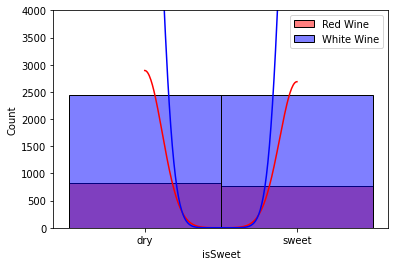

In [24]:
red_sug = red_wine['isSweet']
count = 0
count1 = 0

for x in red_wine['isSweet']:
  if x =='dry':
    count +=1
  elif x =='sweet':
    count1 +=1

print(count)
print(count1)


sns.histplot(red_wine, x='isSweet', kde=True, color='red', label='Red Wine')
sns.histplot(white_wine, x='isSweet', kde=True, color='blue', label='White Wine')
#plt.xlim(0,25)
plt.ylim(0,4000)
plt.legend()
plt.show()

In the following we plot figures to show how wine quality compares to the sweetness and specifically isSweet

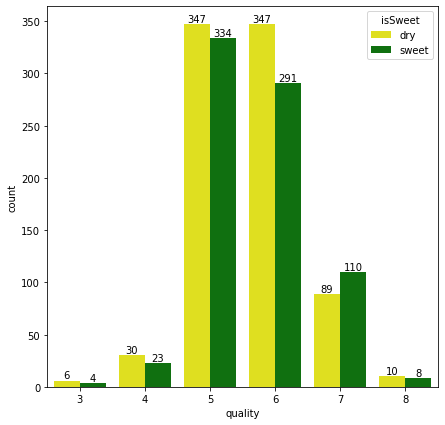

In [25]:
plt.figure(figsize = (7,7))
ax_red = sns.countplot(x = 'quality', hue = 'isSweet', data = red_wine, palette=["yellow", "green"])
for col in ax_red.containers:
  ax_red.bar_label(col)
plt.show()

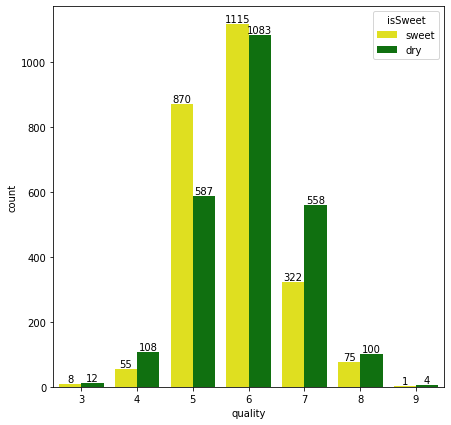

In [26]:
plt.figure(figsize = (7,7))
ax_white = sns.countplot(x = 'quality', hue = 'isSweet', data = white_wine , palette=["yellow", "green"])
for col in ax_white.containers:
  ax_white.bar_label(col)
plt.show()

Next we will show correlation matrixes for red and white wines to carefully understand the correlation between variables and to understand which variables will be most useful for machine learning.

Text(0.5, 1.0, 'Red Wine')

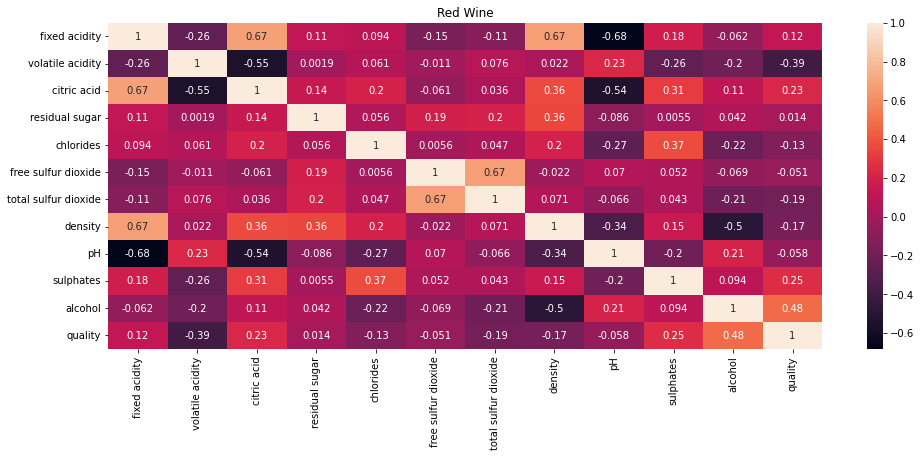

In [27]:
plt.figure(figsize=(16, 6))
corrMRed = red_wine.corr('pearson')
#print(corrM)
sns.heatmap(corrMRed, annot = True)
plt.title('Red Wine')

Text(0.5, 1.0, 'White Wine')

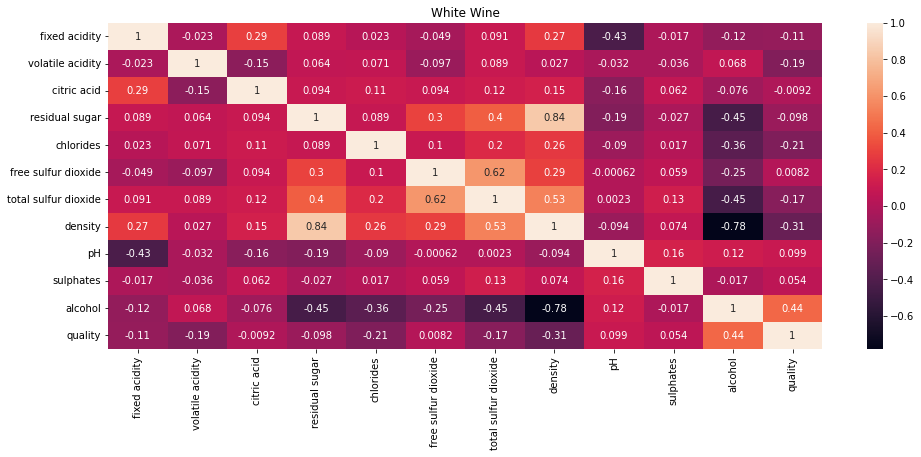

In [28]:
plt.figure(figsize=(16, 6))
corrMWhite = white_wine.corr('pearson')
#print(corrMWhite)
sns.heatmap(corrMWhite, annot = True)
plt.title('White Wine')


After creating the correlation matrix, deciding which subest of variables ot use based on the follwing criteria.

Strong correlations: Looking for variables that are strongly correlated with our target variable that is quality and with each other. These variables are highly likely to be good predictors of the target variable, and they can be used in the machine learning model.

Redundant variables: Looking for variables that are highly correlated with each other. These variables are likely to be redundant and can be removed from the dataset to reduce complexity and improve performance.

Unrelated variables: Looking for variables that are not correlated or extremely uncorrelated with the target variable or with any other variables. These variables are not going to be useful in predicting the target variable and will be removed from the dataset.

After looking at this criteria from red wine it was decided that residual sugar, free sulfur dioxide, pH, alcohol_cat and isSweet, will all be removed and from white wine residual sugar, free sulfur dioxide, citric acid, alcohol_cat and isSweet will all be removed.

Considering this as a classification problem and creating a quality_cat binary variable.

In [29]:
qualb = []
qual = ''
for idx in red_wine.index:
  quality_level = red_wine['quality'][idx]
  if quality_level < 6:
    qual = 0
  else:
    qual = 1
  qualb.append(qual)

qualbw = []
qualw = ''
for idx in white_wine.index:
  quality_level = white_wine['quality'][idx]
  if quality_level < 6:
    qualw = 0
  else:
    qualw = 1

  qualbw.append(qualw)

In [30]:
red_wine['quality_cat'] = qualb
white_wine['quality_cat'] = qualbw

In [31]:
display(red_wine.head(20))
display(white_wine.head(20))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,quality_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mid,dry,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,mid,sweet,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mid,sweet,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,mid,dry,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mid,dry,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,mid,dry,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,mid,dry,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,mid,dry,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,mid,dry,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,mid,sweet,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,quality_cat
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,sweet,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,mid,dry,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,mid,sweet,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,mid,sweet,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,mid,sweet,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,mid,sweet,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,mid,sweet,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,sweet,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,mid,dry,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,mid,dry,1


Preprocessing data sets to remove redundant variables from data:

In [32]:
red_data_clean = red_wine.drop(["residual sugar", "free sulfur dioxide", 'pH', "alcohol_cat", "isSweet",'quality'], axis = 1)
white_data_clean = white_wine.drop(["residual sugar", "free sulfur dioxide", 'citric acid', "alcohol_cat", "isSweet",'quality'], axis = 1)
print(red_data_clean.head())
print(white_data_clean.head())


   fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  quality_cat  
0                  34.0   0.9978       0.56      9.4            0  
1                  67.0   0.9968       0.68      9.8            0  
2                  54.0   0.9970       0.65      9.8            0  
3                  60.0   0.9980       0.58      9.8            1  
4                  34.0   0.9978       0.56      9.4            0  
   fixed acidity  volatile acidity  chlorides  total sulfur dioxide  density  \
0            7.0              0.27      0.045                 170.0   1.0010   
1            6.3              0.30      0.049              

We now need to split both the datasets into their respective train and test set and check for any imbalance.

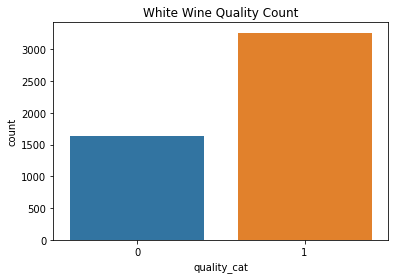

In [33]:
from sklearn.model_selection import train_test_split

white_wine_split = white_data_clean.drop(['quality_cat'],axis =1).values
white_wine_labels = white_data_clean['quality_cat'].values
data_wtrain, data_wtest, label_wtrain, label_wtest = train_test_split(white_wine_split, white_wine_labels, test_size = 0.2, random_state = 5)

sns.countplot(x= 'quality_cat',data = white_data_clean)
plt.title('White Wine Quality Count')
plt.show()


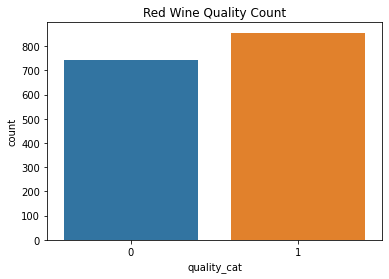

In [34]:
red_wine_split = red_data_clean.drop(['quality_cat'],axis =1).values
red_wine_labels = red_data_clean['quality_cat'].values
data_rtrain, data_rtest, label_rtrain, label_rtest = train_test_split(red_wine_split, red_wine_labels, test_size=0.2, random_state=5)

sns.countplot(x= 'quality_cat',data = red_data_clean)
plt.title('Red Wine Quality Count')
plt.show()


We now need to apply SMOTE as our data is imbalanced

In [35]:
#Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 5)

data_rtrain, label_rtrain = smote.fit_resample(data_rtrain, label_rtrain)
data_wtrain, label_wtrain = smote.fit_resample(data_wtrain, label_wtrain)

Scaling the data:

In [36]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(data_wtrain)
data_wtrain_new = scaler.transform(data_wtrain)
data_wtest_new = scaler.transform(data_wtest)
scaler.fit(data_rtrain)
data_rtrain_new = scaler.transform(data_rtrain)
data_rtest_new = scaler.transform(data_rtest)


Application of non-linear SVM.

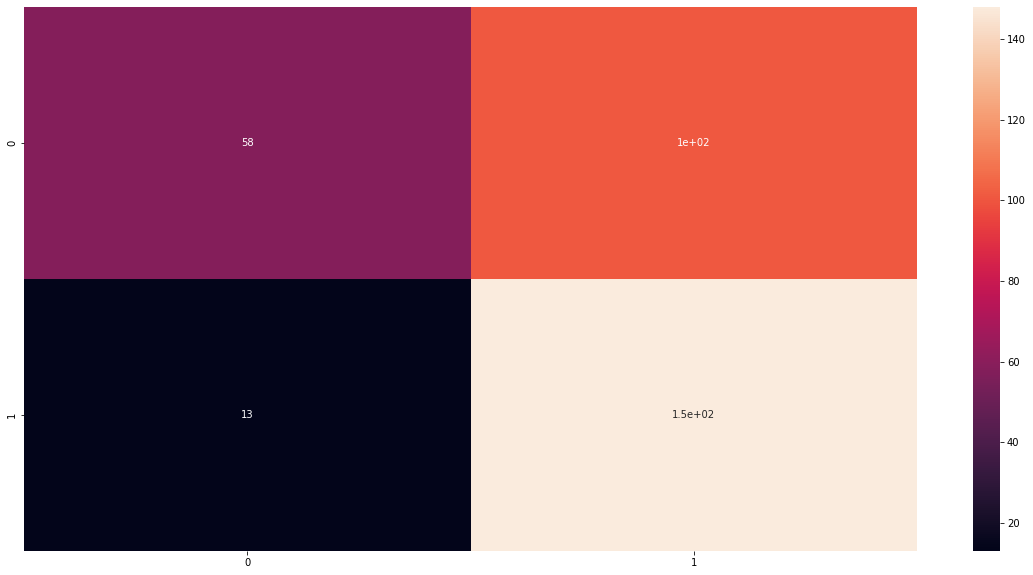

Accuracy SMV: 0.64375 



In [37]:
from sklearn.svm import SVC
non_linear_svm = SVC(kernel='poly', C=10, random_state=5)
non_linear_svm.fit(data_rtrain, label_rtrain)
data_pred = non_linear_svm.predict(data_rtest)
cm = confusion_matrix(label_rtest, data_pred)
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True)
plt.show()
print('Accuracy SMV:', round(accuracy_score(label_rtest, data_pred), 5), '\n')


In [38]:
from sklearn.metrics import classification_report
print(classification_report(label_rtest, data_pred))

              precision    recall  f1-score   support

           0       0.82      0.36      0.50       159
           1       0.59      0.92      0.72       161

    accuracy                           0.64       320
   macro avg       0.71      0.64      0.61       320
weighted avg       0.70      0.64      0.61       320



In [39]:
# Non-Learn Hyperparameterizing with Cross Validation

grid_param_SVC = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'poly']} 


In [40]:
# Red Wine data
gridr_svc = GridSearchCV(SVC(), grid_param_SVC, refit=True, verbose=2, cv=10)
gridr_svc.fit(data_rtrain, label_rtrain)
print(gridr_svc.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.

In [41]:
rcv_results = pd.DataFrame(gridr_svc.cv_results_)
rcv_results.iloc[gridr_svc.best_index_]

mean_fit_time                            0.115979
std_fit_time                             0.013447
mean_score_time                          0.007156
std_score_time                           0.001739
param_C                                      1000
param_kernel                                  rbf
params               {'C': 1000, 'kernel': 'rbf'}
split0_test_score                        0.733813
split1_test_score                        0.755396
split2_test_score                        0.741007
split3_test_score                        0.726619
split4_test_score                        0.733813
split5_test_score                         0.76259
split6_test_score                        0.769784
split7_test_score                        0.726619
split8_test_score                        0.746377
split9_test_score                        0.797101
mean_test_score                          0.749312
std_test_score                           0.021223
rank_test_score                                 1


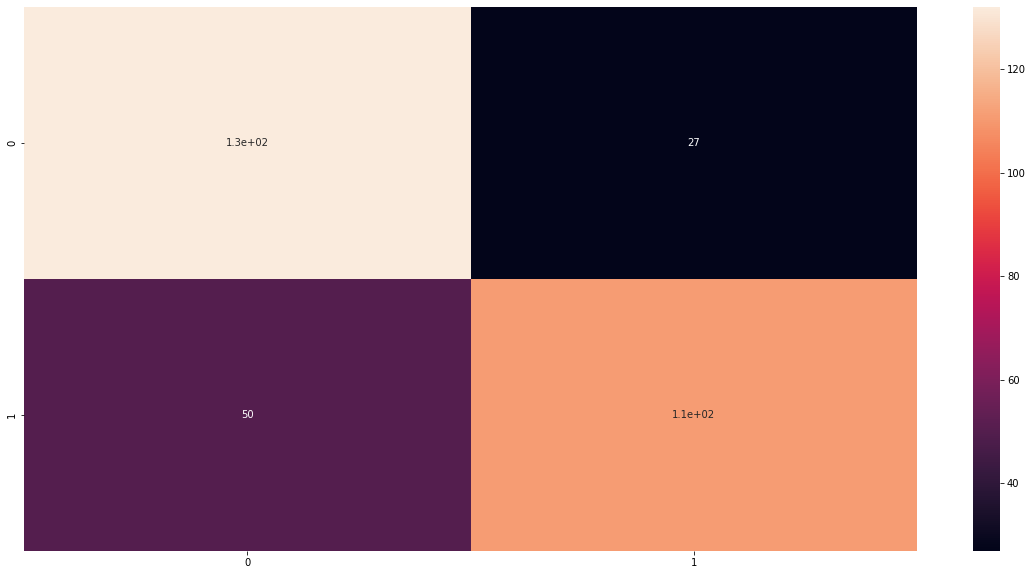

Accuracy SMV: 0.75938 

              precision    recall  f1-score   support

           0       0.73      0.83      0.77       159
           1       0.80      0.69      0.74       161

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.77      0.76      0.76       320



In [42]:
# Best Red Wine SVC Model
r_final_svm = SVC(kernel='rbf', C= 1000)
r_final_svm.fit(data_rtrain, label_rtrain)
data_rpred = r_final_svm.predict(data_rtest)
cm = confusion_matrix(label_rtest, data_rpred)
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True)
plt.show()
print('Accuracy SMV:', round(accuracy_score(label_rtest, data_rpred), 5), '\n')
print(classification_report(label_rtest, data_rpred))

In [43]:
# White Wine data
gridw_svc = GridSearchCV(SVC(), grid_param_SVC, refit=True, verbose=2, cv=10)
gridw_svc.fit(data_wtrain, label_wtrain)
print(gridw_svc.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.5s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END .................................C=0.1, kernel=poly; total time=   1.1s
[CV] END .................................C=0.

In [44]:
wcv_results = pd.DataFrame(gridw_svc.cv_results_)
wcv_results.iloc[gridw_svc.best_index_]

mean_fit_time                            1.587176
std_fit_time                             0.223909
mean_score_time                          0.103024
std_score_time                            0.03146
param_C                                      1000
param_kernel                                  rbf
params               {'C': 1000, 'kernel': 'rbf'}
split0_test_score                        0.694818
split1_test_score                        0.715931
split2_test_score                         0.71977
split3_test_score                        0.737044
split4_test_score                        0.692898
split5_test_score                        0.740883
split6_test_score                        0.740883
split7_test_score                        0.758157
split8_test_score                        0.737044
split9_test_score                        0.729367
mean_test_score                          0.726679
std_test_score                           0.019839
rank_test_score                                 1


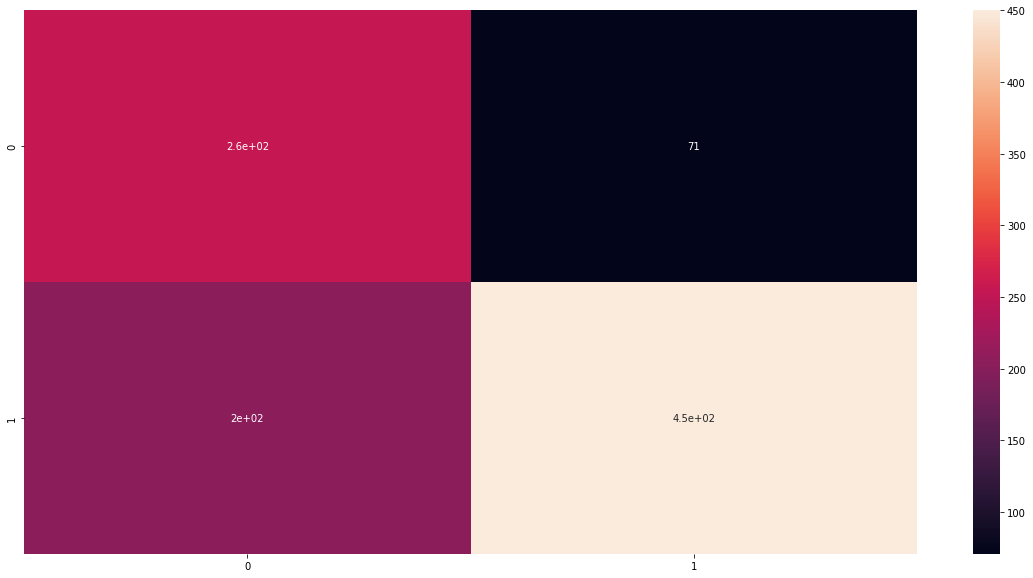

Accuracy White Wine SMV: 0.72041 

              precision    recall  f1-score   support

           0       0.56      0.78      0.65       327
           1       0.86      0.69      0.77       653

    accuracy                           0.72       980
   macro avg       0.71      0.74      0.71       980
weighted avg       0.76      0.72      0.73       980



In [45]:
# Best White Wine SVC Model
w_final_svm = SVC(kernel='rbf', C= 1000)
w_final_svm.fit(data_wtrain, label_wtrain)
data_wpred = w_final_svm.predict(data_wtest)
wcm = confusion_matrix(label_wtest, data_wpred)
plt.figure(figsize=(20, 10))
sns.heatmap(wcm, annot=True)
plt.show()
print('Accuracy White Wine SMV:', round(accuracy_score(label_wtest, data_wpred), 5), '\n')
print(classification_report(label_wtest, data_wpred))

Next we applied the KNN model to our datsets.

In [46]:
# KNN model

r_knn = KNeighborsClassifier(n_neighbors=150)
r_knn.fit(data_rtrain_new, label_rtrain)
print("Train Score for red wine:", r_knn.score(data_rtrain_new, label_rtrain))
print("Test Score for red wine:", r_knn.score(data_rtest_new, label_rtest))



Train Score for red wine: 0.7413544668587896
Test Score for red wine: 0.759375


In [47]:
# Using gridsearch to conduct hyperparameterizing with Cross Validation
gridknn_params = [{'n_neighbors': [5,10,15,20,25,30,35,40,45],
               'weights': ['uniform', 'distance'],
               'metric':['euclidean', 'manhattan'], 
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]

r_gridknn_search = GridSearchCV(KNeighborsClassifier(), gridknn_params, verbose=2, cv=10, n_jobs=-1)

r_grid_knnmodel = r_gridknn_search.fit(data_rtrain_new, label_rtrain)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [48]:
# Printing the best parameters for red wine
r_grid_knnmodel.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 25,
 'weights': 'distance'}

In [49]:
r_knn_cv = KNeighborsClassifier(n_neighbors = 25, weights = 'distance', metric = 'manhattan', algorithm = 'auto')
r_knn_cv.fit(data_rtrain_new, label_rtrain)
print("Train Score for red wine after Cross Validation:", r_knn_cv.score(data_rtrain_new, label_rtrain))
print("Test Score for red wine after Cross Validation:", r_knn_cv.score(data_rtest_new, label_rtest))

Train Score for red wine after Cross Validation: 1.0
Test Score for red wine after Cross Validation: 0.825


In [50]:
w_knn = KNeighborsClassifier(n_neighbors=150)
w_knn.fit(data_wtrain_new, label_wtrain)
print("Train Score for white wine:", w_knn.score(data_wtrain_new, label_wtrain))
print("Test Score for white wine:", w_knn.score(data_wtest_new, label_wtest))

Train Score for white wine: 0.7431861804222649
Test Score for white wine: 0.713265306122449


In [51]:
w_gridknn_search = GridSearchCV(KNeighborsClassifier(), gridknn_params, verbose=2, cv=10)

w_grid_knnmodel = w_gridknn_search.fit(data_wtrain_new, label_wtrain)

# Printing the best parameters for red wine
w_grid_knnmodel.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 10,
 'weights': 'distance'}

In [52]:
w_grid_knnmodel.best_score_

0.8489443378119003

In [53]:

w_knn_cv = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric = 'manhattan', algorithm = 'auto')
w_knn_cv.fit(data_wtrain_new, label_wtrain)
print("Train Score for white wine after Cross Validation:", w_knn_cv.score(data_wtrain_new, label_wtrain))
print("Test Score for white wine after Cross Validation:", w_knn_cv.score(data_wtest_new, label_wtest))

Train Score for white wine after Cross Validation: 1.0
Test Score for white wine after Cross Validation: 0.8153061224489796


Completed the evaluation of our KNN model:

In [54]:
# from helpers import plot_ROC
# print('KNN:\n')
# print('Train SetReport:\n')
# print(classification_report(label_rtrain, ))
# print('Test Set Report:\n')
# print(classification_report(label_rtest, ))

# print("Cross-validation scores")
# scores = cross_val_score(r_knn, data_rtrain_new, label_rtrain, cv=3)
# scores = cross_val_score(w_knn, data_rtest_new, label_rtest, cv=3)
# plot_ROC(clf_knn, data_rtest_new, label_rtest)

We can now move onto the next part of the in which we consider this as a regression problem and impliment Logistic Regression as a model. As we did above we drop the slected redundant variables and instead of converting quality to a binary variable we leave it as it is and take it as the label set.

In [55]:
red_wine_reg = red_wine.drop(["residual sugar", "free sulfur dioxide", 'pH', "alcohol_cat", "isSweet"], axis=1)
white_wine_reg = white_wine.drop(["residual sugar", "free sulfur dioxide", 'pH', "alcohol_cat", "isSweet"], axis=1)
display(red_wine_reg.head())
display(white_wine_reg.head())

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6,1
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,quality_cat
0,7.0,0.27,0.36,0.045,170.0,1.0010,0.45,8.8,6,1
1,6.3,0.30,0.34,0.049,132.0,0.9940,0.49,9.5,6,1
2,8.1,0.28,0.40,0.050,97.0,0.9951,0.44,10.1,6,1
3,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,9.9,6,1
4,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,9.9,6,1


We again split the dataset

In [56]:
red_wine_regf = red_wine_reg.drop(['quality'],axis =1).values
red_reg_labels = red_wine_reg['quality'].values
white_wine_regf = white_wine_reg.drop(['quality'],axis =1).values
white_reg_labels = white_wine_reg['quality'].values

#Create the splits
data_train_regfr,data_test_regfr, labels_train_regfr,labels_test_regfr = train_test_split(red_wine_regf,red_reg_labels,test_size = 0.2, random_state = 5)
data_train_regfw,data_test_regfw, labels_train_regfw,labels_test_regfw = train_test_split(white_wine_regf,white_reg_labels,test_size = 0.2, random_state = 5)

#Scale the data
scaler = StandardScaler()
scaler.fit(data_train_regfr)
data_train_regfr_scaled = scaler.transform(data_train_regfr)
data_test_regfr_scaled = scaler.transform(data_test_regfr)

scaler.fit(data_train_regfw)
data_train_regfw_scaled = scaler.transform(data_train_regfw)
data_test_regfw_scaled = scaler.transform(data_test_regfw)

Impliment the logistic regresion model.

In [57]:
#Complete the logistic Regression

from sklearn.linear_model import LogisticRegression
penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'
logistic_regression_red = LogisticRegression(penalty = penalty,
                                         C = C,
                                         solver = solver,
                                         multi_class = multi_class)

logistic_regression_red.fit(data_train_regfr_scaled, labels_train_regfr)
logistic_regression_white = LogisticRegression(penalty = penalty,
                                         C = C,
                                         solver = solver,
                                         multi_class = multi_class)

logistic_regression_white.fit(data_train_regfw_scaled, labels_train_regfw)
logistic_regression_red_test_predictions = logistic_regression_red.predict(data_test_regfr_scaled)
logistic_regression_white_test_predictions = logistic_regression_white.predict(data_test_regfw_scaled)
logistic_regression_red_train_predictions = logistic_regression_red.predict(data_train_regfr_scaled)
logistic_regression_white_train_predictions = logistic_regression_white.predict(data_train_regfw_scaled)

test_acc_red_reg = accuracy_score(labels_test_regfr,logistic_regression_red_test_predictions)
print(f"Test acc for red wine: {test_acc_red_reg * 100}%")
test_acc_white_reg = accuracy_score(labels_test_regfw,logistic_regression_white_test_predictions)
print(f"Test acc for white wine: {test_acc_white_reg * 100}%")
train_acc_red_reg = accuracy_score(labels_train_regfr,logistic_regression_red_train_predictions)
print(f"Train acc for red wine: {train_acc_red_reg * 100}%")
train_acc_white_reg = accuracy_score(labels_train_regfw,logistic_regression_white_train_predictions)
print(f"Train acc for white wine: {train_acc_white_reg * 100}%")


Test acc for red wine: 84.6875%
Test acc for white wine: 77.24489795918367%
Train acc for red wine: 83.3463643471462%
Train acc for white wine: 75.34456355283308%


Next we must evluate the logisitc regression model using MSE and RMSE:

In [58]:
print("Cross-validation scores")
scores = cross_val_score(logistic_regression_red, data_train_regfr_scaled, labels_train_regfr, cv=3)
print(f"Training set Scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(logistic_regression_red, data_test_regfr_scaled, labels_test_regfr, cv=3)
print(f"Test set Scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(labels_test_regfr, logistic_regression_red_test_predictions))
print("RMSE: ", np.sqrt(mean_squared_error(labels_test_regfr, logistic_regression_red_test_predictions)))

Cross-validation scores
Training set Scores: 0.83 (± 0.03)
Test set Scores: 0.83 (± 0.04)

MSE:  0.209375
RMSE:  0.4575751304430782


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
